In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity



In [2]:


# Load the dataset (replace 'books.csv' with your actual file path)

df = pd.read_csv('book.csv')

df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
# Display the first few rows of the dataset
print(df.head())



   ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0  


In [4]:
# Calculate cosine similarity between books
cosine_sim_books = cosine_similarity(df.T)



In [5]:
# Display the cosine similarity matrix
print("Cosine Similarity Matrix between Books:")
print(pd.DataFrame(cosine_sim_books, index=df.columns, columns=df.columns))

# Function

Cosine Similarity Matrix between Books:
           ChildBks  YouthBks   CookBks  DoItYBks    RefBks    ArtBks  \
ChildBks   1.000000  0.509948  0.599558  0.532750  0.502955  0.508949   
YouthBks   0.509948  1.000000  0.496008  0.437190  0.418819  0.413547   
CookBks    0.599558  0.496008  1.000000  0.537821  0.501554  0.518166   
DoItYBks   0.532750  0.437190  0.537821  1.000000  0.428957  0.473733   
RefBks     0.502955  0.418819  0.501554  0.428957  1.000000  0.393641   
ArtBks     0.508949  0.413547  0.518166  0.473733  0.393641  1.000000   
GeogBks    0.570703  0.461047  0.558133  0.474938  0.454145  0.494364   
ItalCook   0.387928  0.352019  0.513168  0.326989  0.298017  0.341619   
ItalAtlas  0.227811  0.182873  0.225686  0.186007  0.415324  0.190618   
ItalArt    0.251340  0.209928  0.283579  0.256523  0.196085  0.448603   
Florence   0.226390  0.155610  0.219655  0.180082  0.203204  0.299929   

            GeogBks  ItalCook  ItalAtlas   ItalArt  Florence  
ChildBks   0.570703 

In [6]:
# Function to recommend books based on cosine similarity
def recommend_books(book_title, df, cosine_sim_books):
    # Get the index of the given book title
    book_index = df.columns.get_loc(book_title)

    # Get the cosine similarity scores for the given book
    book_similarity = cosine_sim_books[book_index]

    # Get the indices of top recommended books
    top_recommendations = np.argsort(book_similarity)[::-1][1:]

    return df.columns[top_recommendations]

In [7]:
# Example: Recommend books similar to 'CookBks'
book_title_to_recommend = 'CookBks'
recommendations = recommend_books(book_title_to_recommend, df, cosine_sim_books)

# Display the top recommended books
print(f"\nTop recommended books for '{book_title_to_recommend}':\n{recommendations}")


Top recommended books for 'CookBks':
Index(['ChildBks', 'GeogBks', 'DoItYBks', 'ArtBks', 'ItalCook', 'RefBks',
       'YouthBks', 'ItalArt', 'ItalAtlas', 'Florence'],
      dtype='object')


In [8]:
# User-item matrix (transposed)
user_item_matrix = df.T



In [9]:
# Calculate cosine similarity between users
cosine_sim_users = cosine_similarity(user_item_matrix)

# Display the cosine similarity matrix
print("\nCosine Similarity Matrix between Users:")
print(pd.DataFrame(cosine_sim_users, index=df.columns, columns=df.columns))




Cosine Similarity Matrix between Users:
           ChildBks  YouthBks   CookBks  DoItYBks    RefBks    ArtBks  \
ChildBks   1.000000  0.509948  0.599558  0.532750  0.502955  0.508949   
YouthBks   0.509948  1.000000  0.496008  0.437190  0.418819  0.413547   
CookBks    0.599558  0.496008  1.000000  0.537821  0.501554  0.518166   
DoItYBks   0.532750  0.437190  0.537821  1.000000  0.428957  0.473733   
RefBks     0.502955  0.418819  0.501554  0.428957  1.000000  0.393641   
ArtBks     0.508949  0.413547  0.518166  0.473733  0.393641  1.000000   
GeogBks    0.570703  0.461047  0.558133  0.474938  0.454145  0.494364   
ItalCook   0.387928  0.352019  0.513168  0.326989  0.298017  0.341619   
ItalAtlas  0.227811  0.182873  0.225686  0.186007  0.415324  0.190618   
ItalArt    0.251340  0.209928  0.283579  0.256523  0.196085  0.448603   
Florence   0.226390  0.155610  0.219655  0.180082  0.203204  0.299929   

            GeogBks  ItalCook  ItalAtlas   ItalArt  Florence  
ChildBks   0.570703

In [10]:
# Function to recommend books for a specific user based on cosine similarity
def recommend_books_for_user(user_id, df, user_item_matrix, cosine_sim_users):
    # Get the index of the given user ID
    user_index = df.index.get_loc(user_id)

    # Get the cosine similarity scores for the given user
    user_similarity = cosine_sim_users[user_index]

    # Identify books that the given user has not interacted with (rating = 0)
    unrated_books = np.where(user_item_matrix.iloc[user_index] == 0)[0]

    # Calculate the predicted ratings for unrated books
    predicted_ratings = np.sum(user_item_matrix.iloc[:, unrated_books] * user_similarity[:, np.newaxis], axis=0) / np.sum(np.abs(user_similarity))

    # Get the indices of top recommended books
    top_recommendations = np.argsort(predicted_ratings)[::-1]

    return df.columns[top_recommendations]



In [15]:
# Example: Recommend books similar to 'DoItYBks'
book_title_to_recommend = 'DoItYBks'
recommendations = recommend_books(book_title_to_recommend, df, cosine_sim_books)

# Display the top recommended books
print(f"\nTop recommended books for '{book_title_to_recommend}':\n{recommendations}")


Top recommended books for 'DoItYBks':
Index(['CookBks', 'ChildBks', 'GeogBks', 'ArtBks', 'YouthBks', 'RefBks',
       'ItalCook', 'ItalArt', 'ItalAtlas', 'Florence'],
      dtype='object')


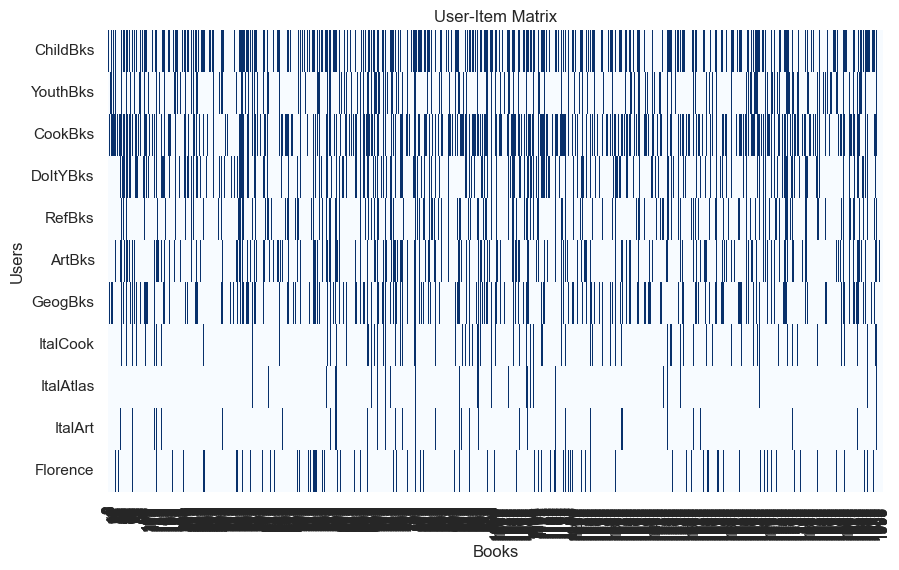

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for visualizations
sns.set(style="whitegrid")

# Visualization 1: Heatmap of User-Item Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(user_item_matrix, cmap="Blues", cbar=False, xticklabels=1)
plt.title('User-Item Matrix')
plt.xlabel('Books')
plt.ylabel('Users')
plt.show()



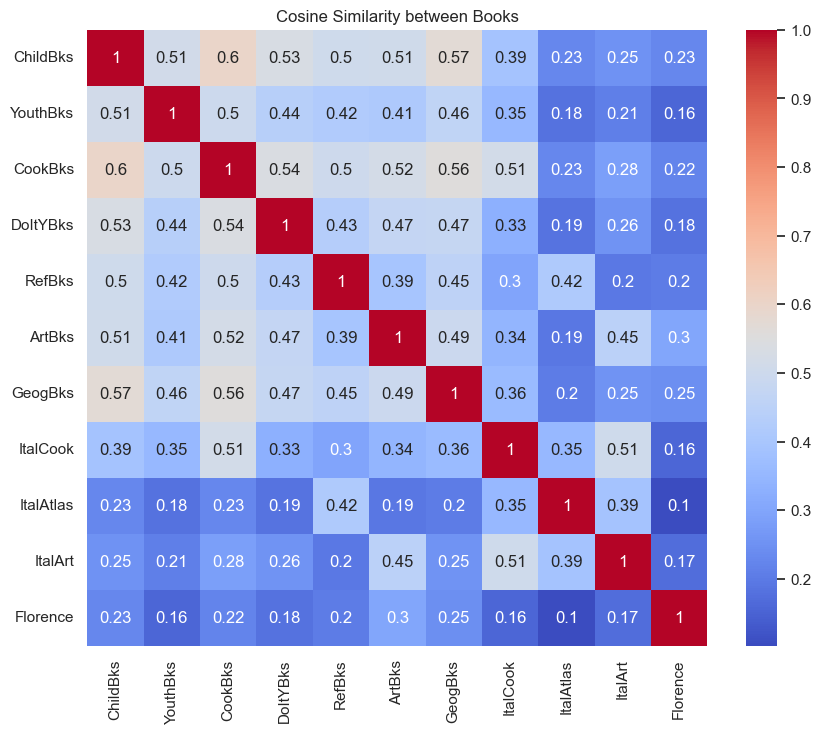

In [17]:
# Visualization 2: Cosine Similarity Matrix between Books
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_books, annot=True, cmap="coolwarm", xticklabels=df.columns, yticklabels=df.columns)
plt.title('Cosine Similarity between Books')
plt.show()



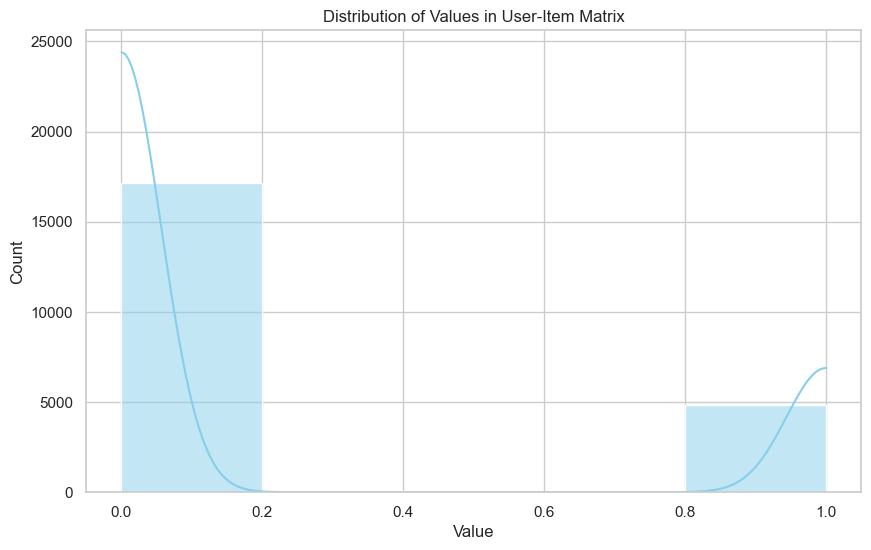

In [23]:


# Assuming 'df' is a DataFrame representing the user-item matrix
plt.figure(figsize=(10, 6))
sns.histplot(df.values.flatten(), bins=5, kde=True, color='skyblue')
plt.title('Distribution of Values in User-Item Matrix')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


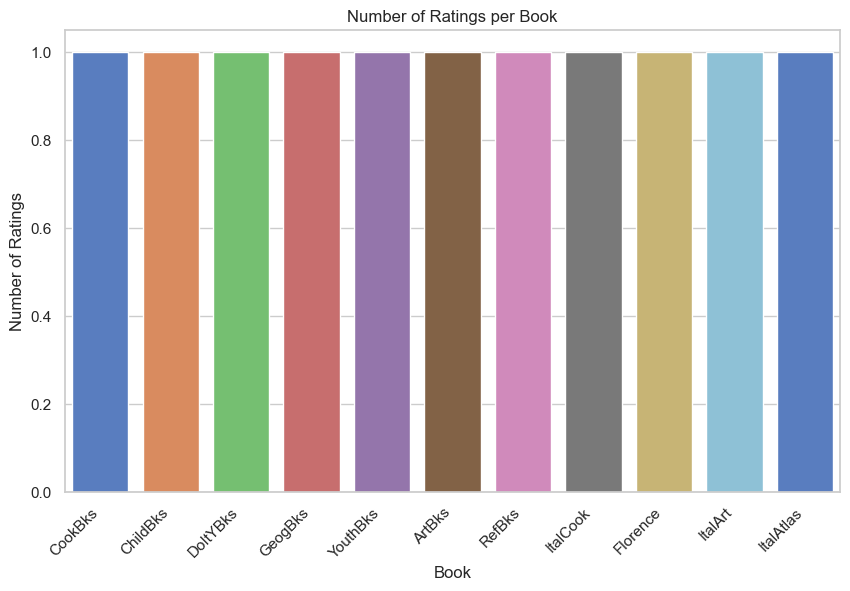

In [26]:
# Assuming 'df' is a DataFrame representing the user-item matrix
plt.figure(figsize=(10, 6))
sns.countplot(x=df.columns, palette='muted', order=df.columns[df.sum(axis=0).argsort()[::-1]])
plt.title('Number of Ratings per Book')
plt.xlabel('Book')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()
